<a href="https://colab.research.google.com/github/Angelicogfa/analise_fraude/blob/master/analise_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/computingvictor/transactions-fraud-datasets?select=mcc_codes.json

## Importação de bibliotecas

In [1]:
import os
import json
import kagglehub
import pandas as pd
from shutil import move

In [2]:
pd.set_option('display.max_columns', None)

## Carregamento de dados

In [3]:
FILE_PATH = './data/'

In [4]:
# Download latest version
path = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets")

print("Path to dataset files:", path)

100%|██████████| 348M/348M [00:18<00:00, 19.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/computingvictor/transactions-fraud-datasets/versions/1


In [5]:
if os.path.exists(FILE_PATH):
    print('Pasta já existe')
else:
    os.mkdir(FILE_PATH)

In [6]:
for file in os.listdir(path):
    file_path = os.path.join(path, file)
    move(file_path, FILE_PATH)

In [7]:
os.listdir(FILE_PATH)

['cards_data.csv',
 'train_fraud_labels.json',
 'mcc_codes.json',
 'users_data.csv',
 'transactions_data.csv']

In [8]:
df_transaction = pd.read_csv(FILE_PATH + '/transactions_data.csv')
df_transaction.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [9]:
with open(FILE_PATH + '/mcc_codes.json', mode='r', encoding='utf-8') as f:
    codes = json.load(f)
    print(codes)

{'5812': 'Eating Places and Restaurants', '5541': 'Service Stations', '7996': 'Amusement Parks, Carnivals, Circuses', '5411': 'Grocery Stores, Supermarkets', '4784': 'Tolls and Bridge Fees', '4900': 'Utilities - Electric, Gas, Water, Sanitary', '5942': 'Book Stores', '5814': 'Fast Food Restaurants', '4829': 'Money Transfer', '5311': 'Department Stores', '5211': 'Lumber and Building Materials', '5310': 'Discount Stores', '3780': 'Computer Network Services', '5499': 'Miscellaneous Food Stores', '4121': 'Taxicabs and Limousines', '5300': 'Wholesale Clubs', '5719': 'Miscellaneous Home Furnishing Stores', '7832': 'Motion Picture Theaters', '5813': 'Drinking Places (Alcoholic Beverages)', '4814': 'Telecommunication Services', '5661': 'Shoe Stores', '5977': 'Cosmetic Stores', '8099': 'Medical Services', '7538': 'Automotive Service Shops', '5912': 'Drug Stores and Pharmacies', '4111': 'Local and Suburban Commuter Transportation', '5815': 'Digital Goods - Media, Books, Apps', '8021': 'Dentists 

In [10]:
df_cods = pd.DataFrame.from_dict(codes.items())
df_cods.columns = ['mcc', 'description']
df_cods['mcc'] = df_cods['mcc'].astype(int)
df_cods.head()

,mcc,description
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


In [11]:
df = pd.merge(df_transaction, df_cods, on='mcc', how='left')
df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,Money Transfer
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN,Money Transfer
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,Drinking Places (Alcoholic Beverages)


In [12]:
del df_transaction, df_cods, codes

In [13]:
df_cards = pd.read_csv(FILE_PATH + '/cards_data.csv')
df_cards.rename(columns={'id': 'card_id'}, inplace=True)
df_cards.head()

,card_id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [14]:
df_users = pd.read_csv(FILE_PATH + '/users_data.csv')
df_users.rename(columns={'id': 'client_id'}, inplace=True)
df_users.head()

,client_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [15]:
df_frauds = pd.read_json(FILE_PATH + '/train_fraud_labels.json').reset_index()
df_frauds.columns = ['id', 'target']
df_frauds.head()

,id,target
0,10649266,No
1,23410063,No
2,9316588,No
3,12478022,No
4,9558530,No


In [16]:
df_frauds['target'].value_counts(normalize=True)

,proportion
target,
No,0.998505
Yes,0.001495


In [17]:
df = pd.merge(df, df_frauds, on='id', how='left')
del df_frauds

In [18]:
df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,target
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,Miscellaneous Food Stores,No
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,Department Stores,No
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,Money Transfer,No
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN,Money Transfer,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,Drinking Places (Alcoholic Beverages),No


## Ajuste nos tipos de dados de Transações (df), usuários (df_users) e cartoes (df_cards)

In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [20]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   card_id                6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
 12  description     object 
 13  target          object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.4+ GB


In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
def format_value_decimal(value_decimal: str|float) -> float:
    return float(str(value_decimal).replace('$', ''))

In [24]:
df['amount'] = df['amount'].apply(format_value_decimal)
df['mcc'] =  df['mcc'].apply(str)

In [25]:
df_users['per_capita_income'] = df_users['per_capita_income'].apply(format_value_decimal)
df_users['yearly_income'] = df_users['yearly_income'].apply(format_value_decimal)
df_users['total_debt'] = df_users['total_debt'].apply(format_value_decimal)

In [26]:
df_cards['credit_limit'] = df_cards['credit_limit'].apply(format_value_decimal)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          float64       
 5   use_chip        object        
 6   merchant_id     int64         
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             float64       
 10  mcc             object        
 11  errors          object        
 12  description     object        
 13  target          object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 1.4+ GB


In [28]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 218.9+ KB


In [29]:
df['target'].value_counts(dropna=False)

,count
target,
No,8901631
NaN,4390952
Yes,13332


In [30]:
df.query('not target.isna()')['target'].value_counts(dropna=False)

,count
target,
No,8901631
Yes,13332


In [31]:
df.query('not target.isna()', inplace=True)

## Segmentação de dados (treino, teste, validação)

In [32]:
limit_train_test_date = df.sort_values(by='date', ascending=True).query('target == "Yes"')['date'].quantile(0.8)
limit_train_test_date

Timestamp('2018-03-21 02:57:24.000000256')

In [33]:
df_vadalite_date = df.sort_values(by='date', ascending=True).query('date > @limit_train_test_date')
df_vadalite_date.shape

(1509593, 14)

In [34]:
df_vadalite_date['target'].value_counts(normalize=True)

,proportion
target,
No,0.998233
Yes,0.001767


In [35]:
df_train_test_date = df.sort_values(by='date', ascending=True).query('date <= @limit_train_test_date')
df_train_test_date.shape

(7405370, 14)

In [36]:
df_train_test_date['target'].value_counts(normalize=True)

,proportion
target,
No,0.99856
Yes,0.00144


In [37]:
df_user_validation = df_users[df_users['client_id'].isin(df_vadalite_date['client_id'].values)]
df_user_validation.shape

(1207, 14)

In [38]:
df_user_train_test = df_users[df_users['client_id'].isin(df_train_test_date['client_id'].values)]
df_user_train_test.shape

(1219, 14)

In [39]:
df_cards_validation = df_cards[df_cards['card_id'].isin(df_vadalite_date['card_id'])]
df_cards_validation.shape

(3525, 13)

In [40]:
df_cards_train_test = df_cards[df_cards['card_id'].isin(df_train_test_date['card_id'])]
df_cards_train_test.shape

(3976, 13)

In [41]:
del df, df_users, df_cards

In [42]:
df_train_test = df_train_test_date \
    .merge(df_user_train_test, how='left', on=['client_id']) \
    .merge(df_cards_train_test, how='left', on=['card_id', 'client_id'])
df_train_test.shape

(7405370, 38)

In [45]:
if os.path.exists(',/database'):
    print('Pasta já existe')
else:
    os.mkdir('./database')

In [46]:
df_train_test.to_csv('./database/train_test_data.csv', sep=';', index=False)

In [47]:
del df_train_test

In [48]:
del df_train_test_date, df_user_train_test, df_cards_train_test

In [49]:
df_validation = df_vadalite_date \
    .merge(df_user_validation, how='left', on=['client_id']) \
    .merge(df_cards_validation, how='left', on=['card_id', 'client_id'])
df_validation.shape

(1509593, 38)

In [50]:
del df_vadalite_date, df_user_validation, df_cards_validation

In [51]:
df_validation.to_csv('./database/validation_data.csv', sep=';', index=False)

In [52]:
del df_validation

## Análise dos dados de Treino/Teste

In [53]:
!pip install tqdm
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.3/417.3 kB 6.6 MB/s eta 0:00:00


In [54]:
import tqdm
import prince
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from itertools import combinations
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.tsa.seasonal import seasonal_decompose

In [55]:
tqdm.tqdm.pandas()
pd.set_option('display.max_columns', None)

In [56]:
df_train_test = pd.read_csv('./database/train_test_data.csv', sep=';')
df_train_test['date'] = pd.to_datetime(df_train_test['date'])
df_train_test['expires'] = pd.to_datetime(df_train_test['expires'], format='%m/%Y')
df_train_test['acct_open_date'] = pd.to_datetime(df_train_test['acct_open_date'], format='%m/%Y')
df_train_test.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,description,target,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN,Miscellaneous Food Stores,No,30,67,1989,7,Female,594 Mountain View Street,46.80,-100.76,23679.0,48277.0,110153.0,740,4,Mastercard,Debit (Prepaid),5497590243197280,2022-07-01,306,YES,2,55.0,2008-05-01,2008,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN,Department Stores,No,48,67,1971,6,Male,604 Pine Street,40.80,-91.12,18076.0,36853.0,112139.0,834,5,Mastercard,Credit,5175842699412235,2024-12-01,438,YES,1,9100.0,2005-09-01,2015,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN,Money Transfer,No,49,65,1970,4,Male,2379 Forest Lane,33.18,-117.29,16894.0,34449.0,36540.0,686,3,Mastercard,Debit,5874992802287595,2020-05-01,256,YES,1,14802.0,2006-01-01,2008,No
3,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN,Drinking Places (Alcoholic Beverages),No,51,69,1968,5,Male,166 River Drive,38.86,-76.60,33529.0,68362.0,96182.0,711,2,Visa,Debit,4354185735186651,2020-01-01,120,YES,1,19113.0,2009-07-01,2014,No
4,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,NaN,Book Stores,No,47,65,1972,12,Female,14780 Plum Lane,40.84,-73.87,25537.0,52065.0,98613.0,828,5,Mastercard,Debit (Prepaid),5207231566469664,2014-03-01,198,YES,1,89.0,2008-01-01,2015,No


In [57]:
df_train_test.shape

(7405370, 38)

In [58]:
df_train_test['target'].value_counts()

,count
target,
No,7394705
Yes,10665


In [59]:
df_train_test.drop(columns=['client_id', 'card_id', 'address', 'cvv', 'merchant_id', 'zip', 'card_number'], inplace=True, errors='ignore')

In [60]:
df_train_test.sample(5)

,id,date,amount,use_chip,merchant_city,merchant_state,mcc,errors,description,target,current_age,retirement_age,birth_year,birth_month,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,card_brand,card_type,expires,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
7400880,20968185,2018-03-19 08:10:00,260.47,Online Transaction,ONLINE,NaN,4814,NaN,Telecommunication Services,No,66,59,1954,1,Female,42.31,-83.21,24561.0,48690.0,36262.0,701,6,Mastercard,Debit,2024-05-01,YES,1,2504.0,2009-10-01,2016,No
2667526,12306508,2013-02-05 16:06:00,86.24,Swipe Transaction,West Hartford,CT,5300,NaN,Wholesale Clubs,No,36,65,1983,3,Male,41.70,-72.67,28557.0,58225.0,101148.0,685,3,Amex,Credit,2021-10-01,YES,1,12600.0,2008-12-01,2008,No
5126947,16795794,2015-10-12 14:08:00,5.01,Swipe Transaction,Henrico,VA,5300,NaN,Wholesale Clubs,No,31,68,1988,9,Female,37.55,-77.46,21602.0,44041.0,109159.0,680,2,Visa,Debit,2015-10-01,NO,1,16820.0,2014-05-01,2014,No
1640633,10438675,2011-12-09 11:54:00,51.87,Online Transaction,ONLINE,NaN,4784,NaN,Tolls and Bridge Fees,No,51,67,1968,12,Female,31.84,-106.43,16823.0,34302.0,84935.0,651,3,Visa,Credit,2016-07-01,YES,1,7700.0,2009-09-01,2009,No
4646993,15918436,2015-04-07 13:54:00,0.65,Online Transaction,ONLINE,NaN,5311,NaN,Department Stores,No,36,68,1983,12,Male,27.48,-82.57,13972.0,28489.0,6087.0,808,4,Mastercard,Debit,2022-07-01,YES,2,1424.0,2004-12-01,2012,No


In [61]:
df_train_test['expire_in_months'] = (df_train_test['expires'].dt.year - df_train_test['date'].dt.year) * 12 + abs(df_train_test['expires'].dt.month - df_train_test['date'].dt.month)
df_train_test['acct_open_date_in_months'] = (df_train_test['date'].dt.year - df_train_test['acct_open_date'].dt.year) * 12 + abs(df_train_test['date'].dt.month - df_train_test['acct_open_date'].dt.month)

In [62]:
df_train_test.drop(columns=['expires', 'acct_open_date'], inplace=True)

### Analise Temporal

In [63]:
df_date_target = df_train_test \
    .assign(date=df_train_test['date'].dt.date) \
    .groupby(by=['date'])['target'].value_counts() \
    .reset_index()
df_date_target['date'] = pd.to_datetime(df_date_target['date'])
df_date_target['year_month'] = df_date_target['date'].dt.to_period('M')
df_date_target.head()

,date,target,count,year_month
0,2010-01-01,No,2328,2010-01
1,2010-01-01,Yes,1,2010-01
2,2010-01-02,No,1971,2010-01
3,2010-01-03,No,2200,2010-01
4,2010-01-03,Yes,1,2010-01


In [64]:
df_pivot = df_date_target.pivot_table(index='year_month', columns='target', values='count', aggfunc='sum', fill_value=0).reset_index()
df_pivot['year_month'] = df_pivot['year_month'].dt.to_timestamp(freq='M')
df_pivot.rename(columns={'No': 'non_fraud', 'Yes': 'fraud'}, inplace=True)
df_pivot.columns.name = None
df_pivot.head()

,year_month,non_fraud,fraud
0,2010-01-31,67937,107
1,2010-02-28,62557,259
2,2010-03-31,68941,261
3,2010-04-30,66492,237
4,2010-05-31,69936,274


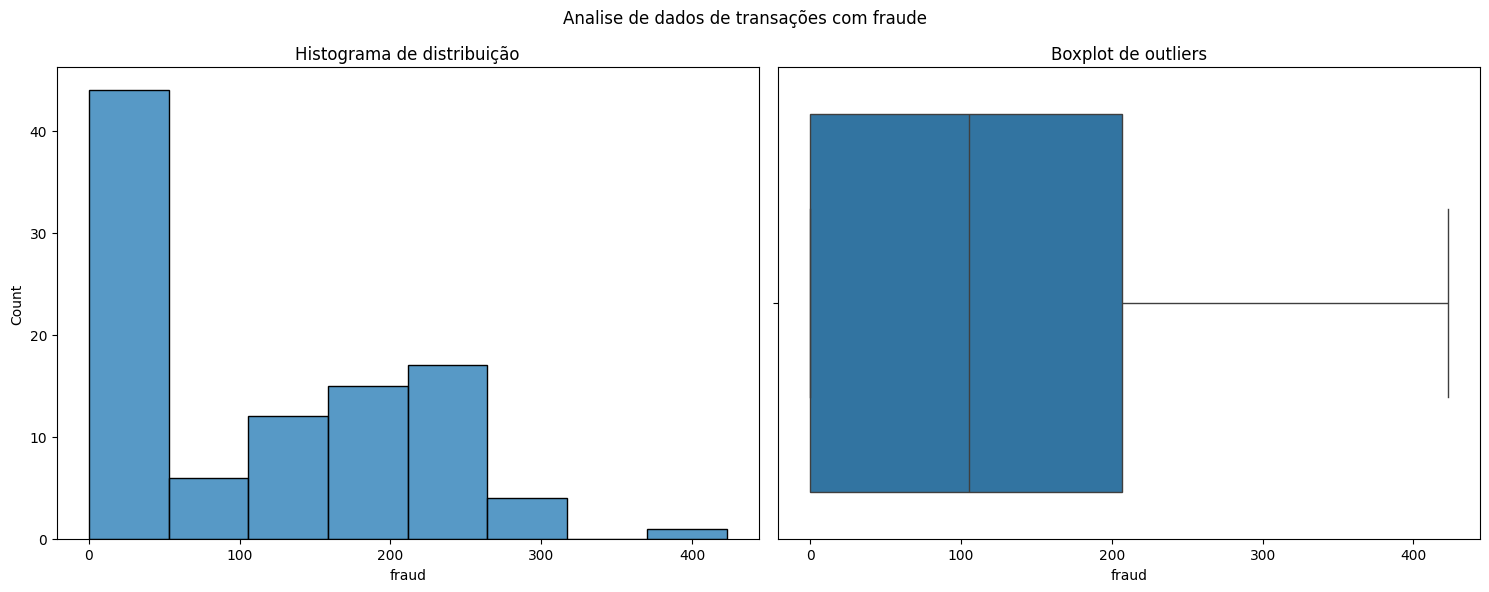

In [67]:
plt.figure(figsize=(15,6))
plt.suptitle('Analise de dados de transações com fraude')

plt.subplot(121)
plt.title('Histograma de distribuição')
sns.histplot(data=df_pivot, x='fraud')

plt.subplot(122)
plt.title('Boxplot de outliers')
sns.boxplot(data=df_pivot, x='fraud')

plt.tight_layout()
plt.show()

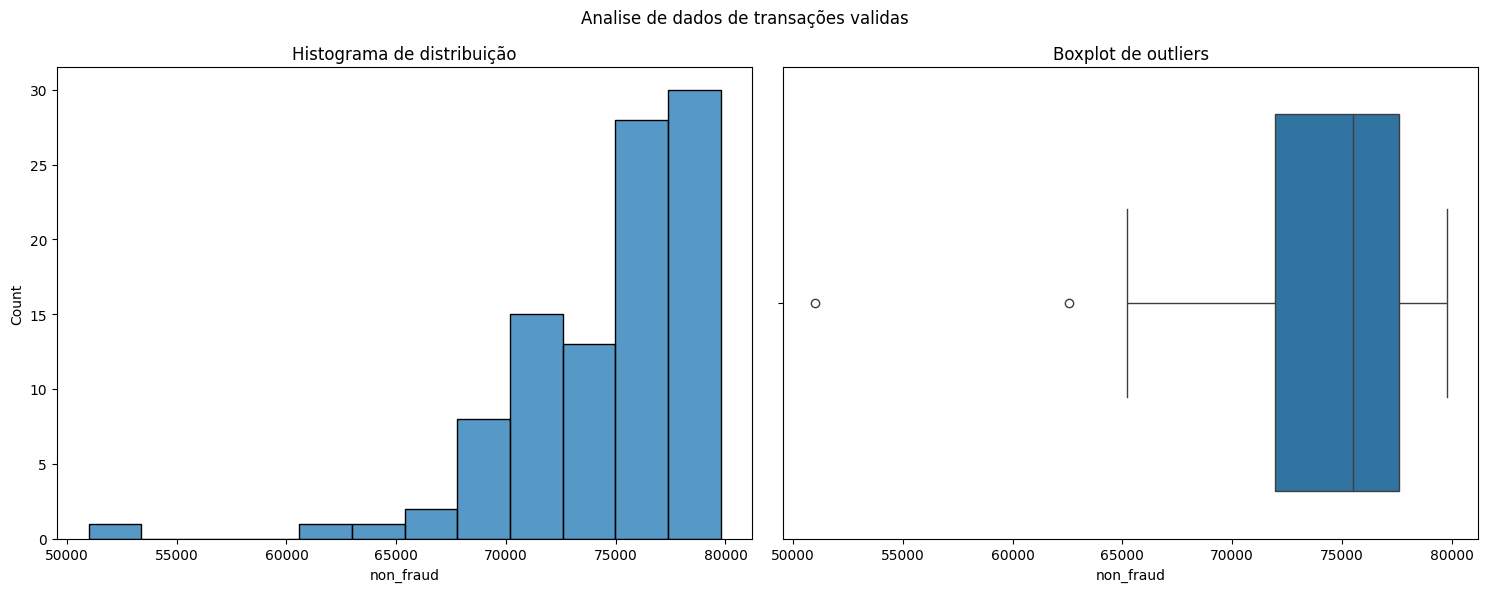

In [68]:
plt.figure(figsize=(15,6))
plt.suptitle('Analise de dados de transações validas')

plt.subplot(121)
plt.title('Histograma de distribuição')
sns.histplot(data=df_pivot, x='non_fraud')

plt.subplot(122)
plt.title('Boxplot de outliers')

sns.boxplot(data=df_pivot, x='non_fraud')

plt.tight_layout()
plt.show()

In [69]:
df_pivot.describe()

,year_month,non_fraud,fraud
count,99,99.000000,99.000000
mean,2014-03-01 01:12:43.636363520,74693.989899,107.727273
min,2010-01-31 00:00:00,50981.000000,0.000000
25%,2012-02-14 12:00:00,71932.500000,0.000000
50%,2014-02-28 00:00:00,75492.000000,105.000000
75%,2016-03-15 12:00:00,77582.000000,206.500000
max,2018-03-31 00:00:00,79779.000000,423.000000
std,NaN,4457.959549,106.634204


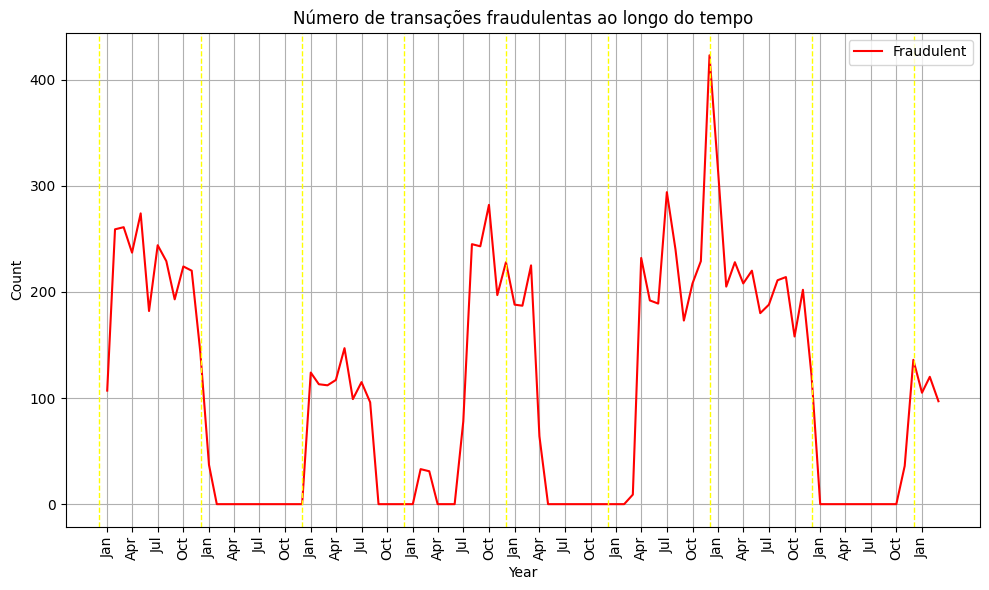

In [70]:
# Plotando
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pivot, x='year_month', y='fraud', color='red', label='Fraudulent')
# sns.lineplot(data=df_pivot, x='year_month', y='non_fraud', label='Non-Fraudulent')

ticks_to_show = df_pivot['year_month'][::3]

plt.xticks(ticks_to_show,
           labels=ticks_to_show.dt.strftime('%b'), rotation=90)

years = df_pivot['year_month'].dt.year.drop_duplicates()
for year in years:
    plt.axvline(x=pd.Timestamp(year=year, month=1, day=1), color='yellow', linestyle='--', linewidth=1.0)

plt.title('Número de transações fraudulentas ao longo do tempo')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

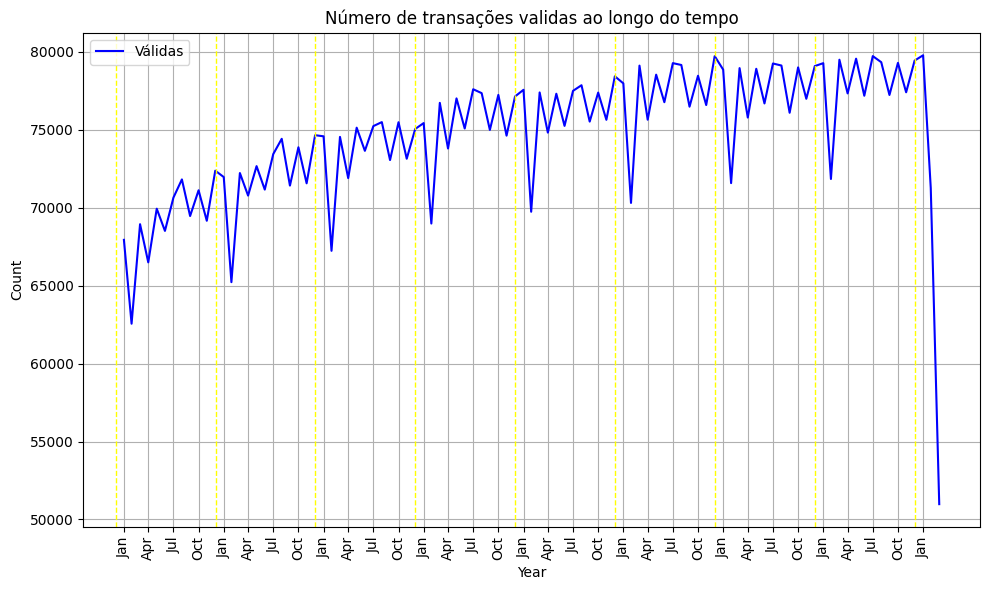

In [71]:
# Plotando
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pivot, x='year_month', y='non_fraud', color='blue', label='Válidas')
# sns.lineplot(data=df_pivot, x='year_month', y='non_fraud', label='Non-Fraudulent')

ticks_to_show = df_pivot['year_month'][::3]

plt.xticks(ticks_to_show,
           labels=ticks_to_show.dt.strftime('%b'), rotation=90)

years = df_pivot['year_month'].dt.year.drop_duplicates()
for year in years:
    plt.axvline(x=pd.Timestamp(year=year, month=1, day=1), color='yellow', linestyle='--', linewidth=1.0)

plt.title('Número de transações validas ao longo do tempo')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
decompa_fraud = seasonal_decompose(df_pivot['fraud'], model='additive', period=12)

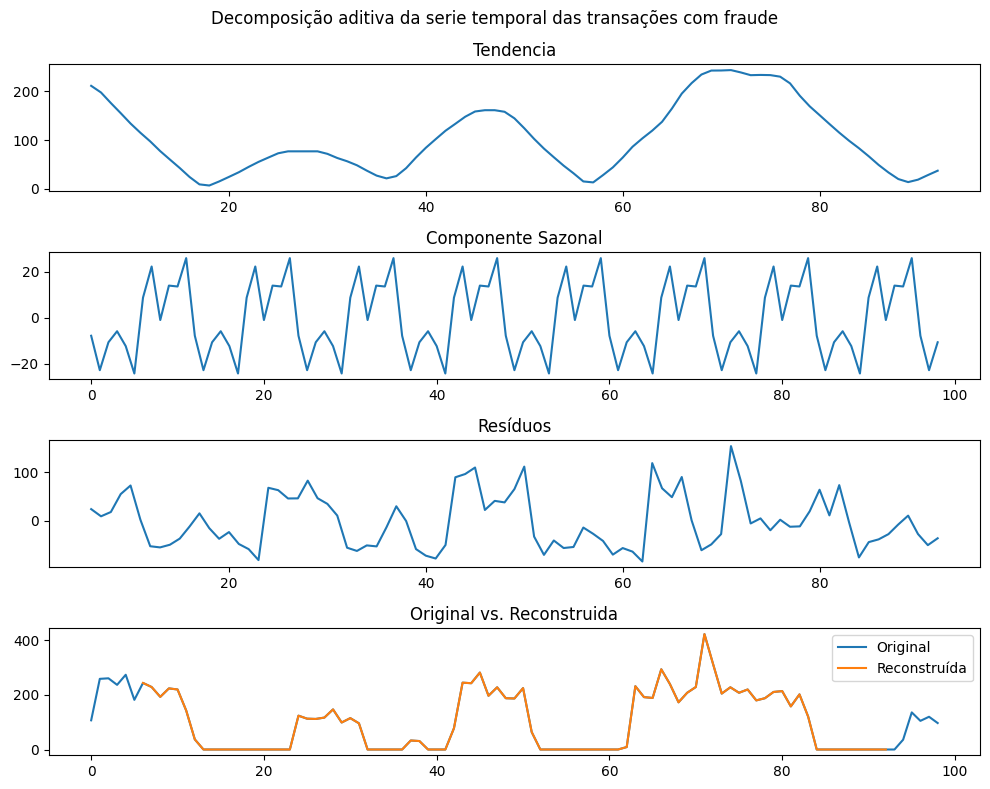

In [76]:
plt.figure(figsize=(10, 8))

plt.suptitle('Decomposição aditiva da serie temporal das transações com fraude')

plt.subplot(4, 1, 1)
plt.plot(decompa_fraud.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decompa_fraud.seasonal)
plt.title('Componente Sazonal')

plt.subplot(4, 1, 3)
plt.plot(decompa_fraud.resid)
plt.title('Resíduos')

plt.subplot(4, 1, 4)
plt.plot(df_pivot['fraud'], label='Original')
plt.plot(decompa_fraud.trend + decompa_fraud.seasonal + decompa_fraud.resid, label='Reconstruída')
plt.title('Original vs. Reconstruida')
plt.legend()

plt.tight_layout()
plt.show()


In [82]:
decompa_nonfraud = seasonal_decompose(df_pivot['non_fraud'], model='multiplicative', period=12)

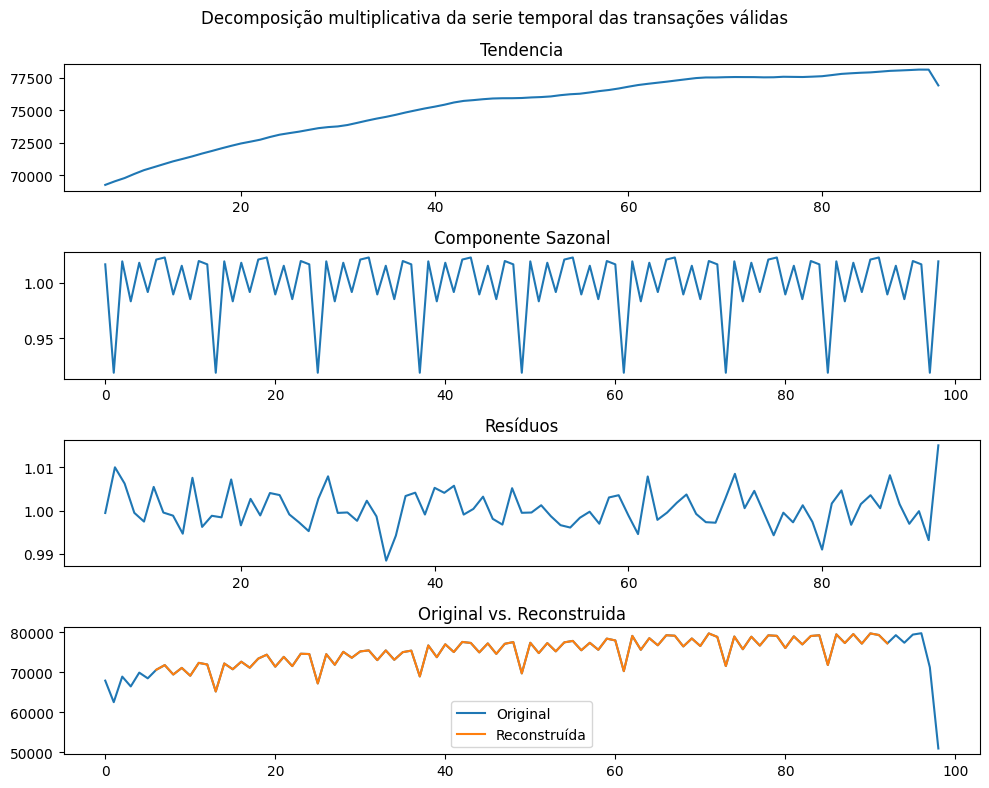

In [83]:
plt.figure(figsize=(10, 8))

plt.suptitle('Decomposição multiplicativa da serie temporal das transações válidas')

plt.subplot(4, 1, 1)
plt.plot(decompa_nonfraud.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decompa_nonfraud.seasonal)
plt.title('Componente Sazonal')

plt.subplot(4, 1, 3)
plt.plot(decompa_nonfraud.resid)
plt.title('Resíduos')

plt.subplot(4, 1, 4)
plt.plot(df_pivot['non_fraud'], label='Original')
plt.plot(decompa_nonfraud.trend * decompa_nonfraud.seasonal * decompa_nonfraud.resid, label='Reconstruída')
plt.title('Original vs. Reconstruida')
plt.legend()

plt.tight_layout()
plt.show()


### Análise Qualitativa

In [ ]:
df_train_test.select_dtypes('object')

,use_chip,merchant_city,merchant_state,errors,description,target,gender,card_brand,card_type,has_chip,card_on_dark_web
0,Swipe Transaction,Beulah,ND,NaN,Miscellaneous Food Stores,No,Female,Mastercard,Debit (Prepaid),YES,No
1,Swipe Transaction,Bettendorf,IA,NaN,Department Stores,No,Male,Mastercard,Credit,YES,No
2,Swipe Transaction,Vista,CA,NaN,Money Transfer,No,Male,Mastercard,Debit,YES,No
3,Swipe Transaction,Harwood,MD,NaN,Drinking Places (Alcoholic Beverages),No,Male,Visa,Debit,YES,No
4,Swipe Transaction,Bronx,NY,NaN,Book Stores,No,Female,Mastercard,Debit (Prepaid),YES,No
...,...,...,...,...,...,...,...,...,...,...,...
7405365,Chip Transaction,Andover,KS,NaN,"Grocery Stores, Supermarkets",No,Male,Mastercard,Debit,YES,No
7405366,Swipe Transaction,Rolla,MO,NaN,Money Transfer,No,Female,Mastercard,Debit,NO,No
7405367,Chip Transaction,Greensburg,PA,NaN,"Utilities - Electric, Gas, Water, Sanitary",No,Female,Mastercard,Debit,YES,No
7405368,Online Transaction,ONLINE,NaN,NaN,"Utilities - Electric, Gas, Water, Sanitary",No,Female,Mastercard,Debit,NO,No


In [ ]:
df_train_test.select_dtypes('object').describe()

,use_chip,merchant_city,merchant_state,errors,description,target,gender,card_brand,card_type,has_chip,card_on_dark_web
count,7405370,7405370,6541016,117765,7405370,7405370,7405370,7405370,7405370,7405370,7405370
unique,3,11846,190,22,108,2,2,4,3,2,1
top,Swipe Transaction,ONLINE,CA,Insufficient Balance,"Grocery Stores, Supermarkets",No,Female,Mastercard,Debit,YES,No
freq,4412725,864354,794465,72940,885927,7394705,3792336,3981769,4601680,6664453,7405370


In [ ]:
df_train_test.drop(columns=['card_on_dark_web'], inplace=True)

MemoryError: Unable to allocate 56.5 MiB for an array with shape (7405370,) and data type object

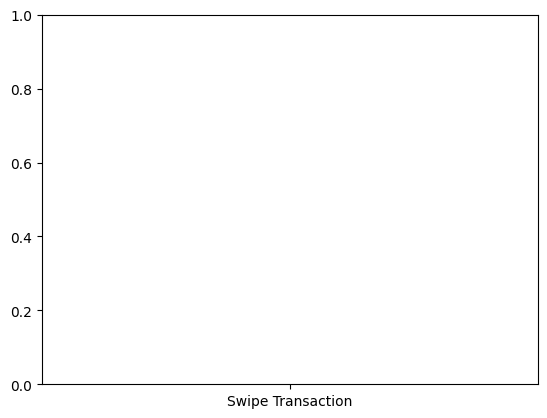

In [ ]:
sns.countplot(data=df_train_test, x='use_chip', hue='target')

In [ ]:
columns_test_qui = []
for column in df_train_test.select_dtypes('object').columns:
    if len(df_train_test[column].unique()) > 10 :
        continue

    print('')
    columns_test_qui.append(column)
    print(df_train_test[column].value_counts(normalize=True))


use_chip
Swipe Transaction     0.595882
Chip Transaction      0.287747
Online Transaction    0.116371
Name: proportion, dtype: float64

target
No     0.99856
Yes    0.00144
Name: proportion, dtype: float64

gender
Female    0.512106
Male      0.487894
Name: proportion, dtype: float64

card_brand
Mastercard    0.537687
Visa          0.372562
Amex          0.064557
Discover      0.025195
Name: proportion, dtype: float64

card_type
Debit              0.621398
Credit             0.309660
Debit (Prepaid)    0.068942
Name: proportion, dtype: float64

has_chip
YES    0.899949
NO     0.100051
Name: proportion, dtype: float64


In [ ]:
tests_qui = []
for column in df_train_test[columns_test_qui].drop(columns=['target']).columns:
    table = pd.crosstab(df_train_test['target'], df_train_test[column])
    chi2, pvalue, gl, freq_esp = chi2_contingency(table)

    print('')
    print(table)
    print(f'Qui² Statistical: {round(chi2, 2)}')
    print(f'p-value: {round(pvalue, 4)}')
    tests_qui.append(dict(origin='target', destiny=column, chi2=chi2, pvalue=pvalue, gl=gl, freq_esp=freq_esp))


use_chip  Chip Transaction  Online Transaction  Swipe Transaction
target                                                           
No                 2130032              853080            4411593
Yes                    839                8694               1132
Qui² Statistical: 50741.12
p-value: 0.0

gender   Female     Male
target                  
No      3786749  3607956
Yes        5587     5078
Qui² Statistical: 5.86
p-value: 0.0155

card_brand    Amex  Discover  Mastercard     Visa
target                                           
No          477280    186212     3975983  2755230
Yes            786       363        5786     3730
Qui² Statistical: 62.36
p-value: 0.0

card_type   Credit    Debit  Debit (Prepaid)
target                                      
No         2289705  4595616           509384
Yes           3444     6064             1157
Qui² Statistical: 296.25
p-value: 0.0

has_chip      NO      YES
target                   
No        739968  6654737
Yes          949   

In [ ]:
df_test_qui = pd.DataFrame(tests_qui)
df_test_qui['valid'] = df_test_qui['pvalue'] < 0.05
df_test_qui.query('valid == True').sort_values(by=['chi2'], ascending=False).sort_values(by='pvalue', ascending=True)

,origin,destiny,chi2,pvalue,gl,freq_esp,valid
0,target,use_chip,50741.124717,0.000000e+00,2,"[[2127802.1811273443, 860532.8979740378, 44063...",True
3,target,card_type,296.248271,4.682796e-65,2,"[[2289846.4730384843, 4595052.793364815, 50980...",True
2,target,card_brand,62.363322,1.837321e-13,3,"[[477377.50315379247, 186306.3000734602, 39760...",True
4,target,has_chip,14.409522,1.470569e-04,1,"[[739849.9527349748, 6654855.047265025], [1067...",True
1,target,gender,5.861594,1.547478e-02,1,"[[3786874.387219005, 3607830.612780995], [5461...",True


In [ ]:
def calculate_sample_size(confidence_level=0.95, error_margin=0.03, p=0.5):
    z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    n = (z ** 2 * p * (1 - p)) / (error_margin ** 2)
    return int(n)

In [ ]:
sample_size = calculate_sample_size(0.99, 0.01, 0.01)
sample_size

656

In [ ]:
sample_data = df_train_test.sample(frac=1.0)[df_test_qui.query('valid == True')['destiny'].values.tolist() + ['target']]
sample_data['target'].value_counts()

target
No     7394705
Yes      10665
Name: count, dtype: int64

In [ ]:
mca = prince.MCA(n_components=2).fit(sample_data)

In [ ]:
quant_dim = mca.J_ - mca.K_

print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 16
quantidade de variáveis: 6
quantidade de dimensões: 10


                                     0         1
use_chip__Chip Transaction    0.053596 -2.561275
use_chip__Online Transaction -0.019151 -0.407253
use_chip__Swipe Transaction  -0.022141  1.316354
gender__Female                0.013979 -0.156069
gender__Male                 -0.014672  0.163814
card_brand__Amex              5.220007 -0.064504
card_brand__Discover          5.181831  1.196030
card_brand__Mastercard       -1.008576  0.090319
card_brand__Visa              0.200659 -0.200054
card_type__Credit             2.578697  0.184441
card_type__Debit             -1.142409 -0.093437
card_type__Debit (Prepaid)   -1.285574  0.013740
has_chip__NO                 -0.390520  5.158082
has_chip__YES                 0.043416 -0.573447
target__No                   -0.000346  0.002810
target__Yes                   0.239849 -1.948459
                0         1
5753450 -0.143293 -0.543598
4455996 -0.344832 -0.495203
2978064 -0.357455  0.151069
4703975  0.275352 -0.448890
4994503 -0.344832 -0.495203

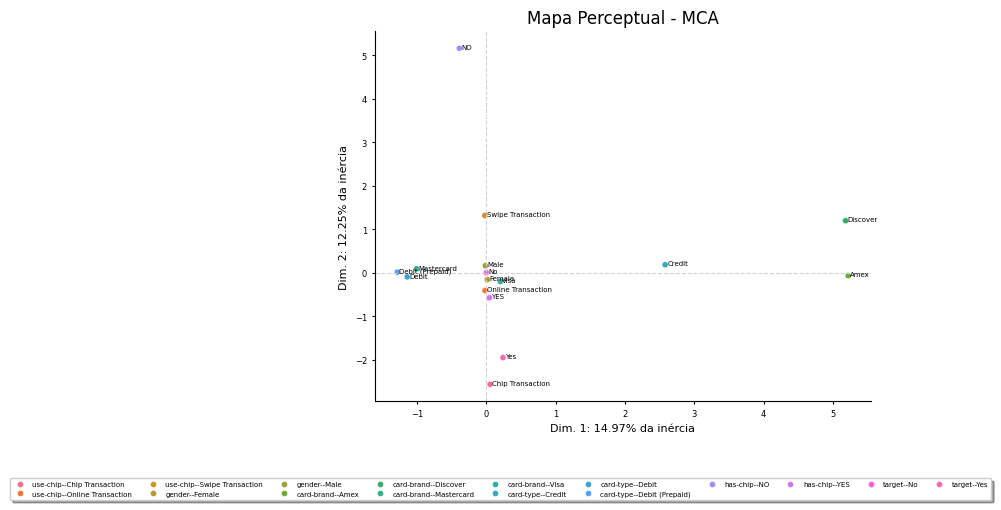

In [ ]:
tabela_autovalores = mca.eigenvalues_summary
coord_padrao = mca.column_coordinates(sample_data)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)

#%% Obtendo as coordenadas das observações do banco de dados

# Na função, as coordenadas das observações vêm das coordenadas-padrão
coord_obs = mca.row_coordinates(sample_data)
print(coord_obs)

#%% Plotando o mapa perceptual (coordenadas-padrão)

# Primeiro passo: gerar um DataFrame detalhado

chart = coord_padrao.reset_index()

nome_categ=[]
for col in sample_data:
    nome_categ.append(sample_data[col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

var_chart = pd.Series(chart['index'].str.replace('_', '-'))

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

# Segundo passo: gerar o gráfico de pontos

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria_id'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(1.25,-0.2), fancybox=True, shadow=True, ncols=10, fontsize='5')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

d:\Repositories\Pessoal\analise-fraude\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


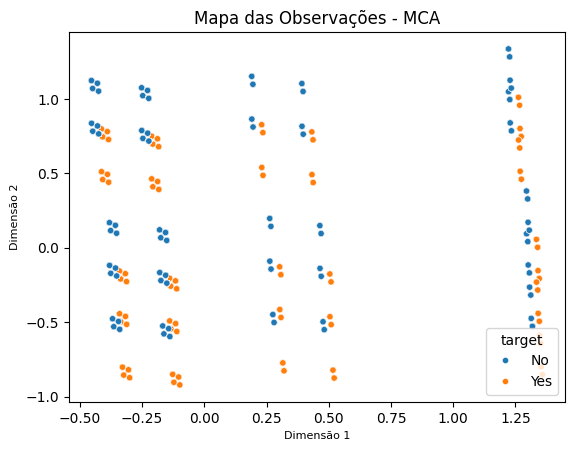

In [ ]:
coord_obs['target'] = sample_data['target']

sns.scatterplot(data=coord_obs, x=0, y=1, hue='target', s=20)
plt.title("Mapa das Observações - MCA", fontsize=12)
plt.xlabel("Dimensão 1", fontsize=8)
plt.ylabel("Dimensão 2", fontsize=8)
plt.show()